In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
%store train_images
%store train_labels

%store test_images
%store test_labels

In [2]:
%store -r train_images
%store -r train_labels

%store -r test_images
%store -r test_labels

# Split the train set into validation and train

In [3]:
# Split data
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1234)

In [4]:
num_of_train_images = len(train_labels)
num_of_val_images = len(val_labels)
num_of_test_images = len(test_labels)

<BarContainer object of 3 artists>

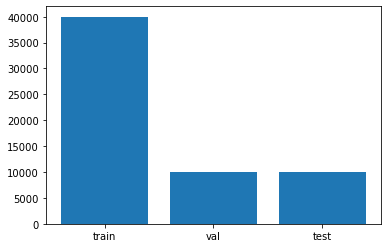

In [5]:
plt.bar(height = [num_of_train_images, num_of_val_images, num_of_test_images], x = ['train', 'val', 'test'])
plt.title('Distribution of datasets')

# Split train set into train and validation set

In [6]:
train_labels_df = pd.DataFrame([x[0] for x in train_labels])
val_labels_df = pd.DataFrame([x[0] for x in val_labels])

train_labels_df.columns = ['class_id']
val_labels_df.columns = ['class_id']

In [7]:
len(train_images[0])

32

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'Distribution of class for val set')

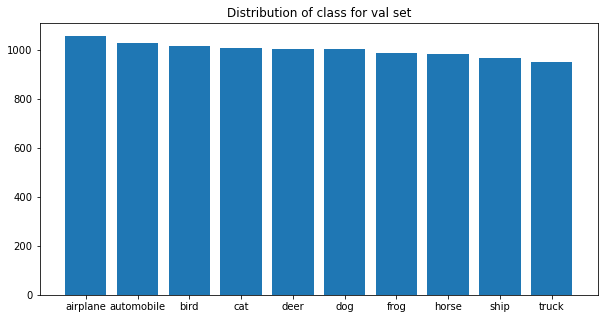

In [9]:
plt.figure(figsize = (10,5))
plt.bar(height = val_labels_df['class_id'].value_counts() , x = class_names)
plt.title('Distribution of class for val set')

Text(0.5, 1.0, 'Distribution of class for train set')

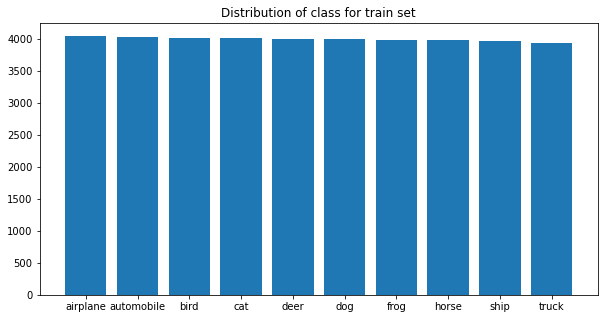

In [10]:
plt.figure(figsize = (10,5))
plt.bar(height = train_labels_df['class_id'].value_counts() , x = class_names)
plt.title('Distribution of class for train set')

In [11]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
val_images = val_images.astype('float32')
test_images = test_images.astype('float32')

# Normalizing Images
train_images = train_images / 255
val_images = val_images/255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
val_labels = np_utils.to_categorical(val_labels, num_classes)

In [12]:
def plot_hist(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# Model 5 Architecture

Epoch 1/300
1250/1250 [==============================] - 11s 7ms/step - loss: 2.2647 - accuracy: 0.1261 - val_loss: 2.1828 - val_accuracy: 0.2046
Epoch 2/300
1250/1250 [==============================] - 9s 7ms/step - loss: 2.1004 - accuracy: 0.2113 - val_loss: 2.0247 - val_accuracy: 0.2628
Epoch 3/300
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9546 - accuracy: 0.2598 - val_loss: 1.8729 - val_accuracy: 0.3090
Epoch 4/300
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8617 - accuracy: 0.2922 - val_loss: 1.7706 - val_accuracy: 0.3477
Epoch 5/300
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7959 - accuracy: 0.3192 - val_loss: 1.7063 - val_accuracy: 0.3608
Epoch 6/300
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7438 - accuracy: 0.3401 - val_loss: 1.6589 - val_accuracy: 0.3848
Epoch 7/300
1250/1250 [==============================] - 11s 8ms/step - loss: 1.7048 - accuracy: 0.3575 - val_loss: 1.6270 - val_

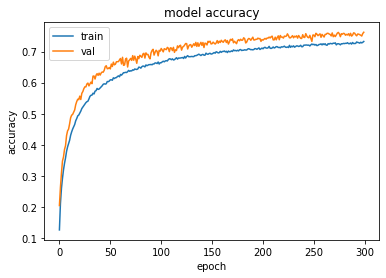

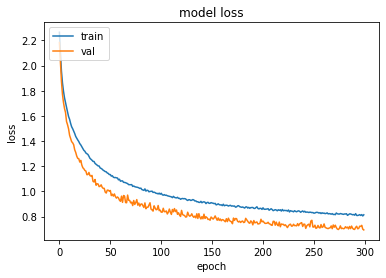

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=(Adam)(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=32, epochs=300, validation_data=(val_images, val_labels))
print(model.optimizer.get_config())
plot_hist(history)

In [15]:
predictions = model.predict(test_images)
predictions_labels = [x.argmax() for x in predictions]
test_labels_maxidx = [x.argmax() for x in test_labels]
correct_count = 0
total_count = len(test_labels_maxidx)
for i in range(0, total_count):
    if predictions_labels[i] == test_labels_maxidx[i]:
        correct_count += 1
test_accuracy = correct_count/total_count
test_accuracy

0.7576